In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\2.2\datasets\climate_action_data.csv')

In [3]:
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [4]:
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [6]:
df.shape
print(df.shape)

(913, 10)


In [7]:
df.duplicated().sum()
print(df.duplicated().sum())

111


In [8]:
df.describe
print(df.describe)

<bound method NDFrame.describe of     Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6        46

In [9]:
df.replace('error', np.nan, inplace=True)

In [10]:
df.duplicated().sum()
print(df.duplicated().sum())

111


In [11]:
df = df.drop_duplicates()
df.shape

(802, 10)

In [12]:
print(df.duplicated().sum())

0


In [13]:
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    

In [14]:
df = df.dropna(subset=['Date'])
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [15]:
df['Crop_Type'] = df['Crop_Type'].fillna('Unknown')

In [16]:
df.isnull().sum()
print(df.isnull().sum())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [17]:
df = df[df['Crop_Type'] != 'Unknown']

In [18]:
crop_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print(crop_moisture)

Crop_Type
Wheat       47.185349
Maize       44.955032
Beans       44.339272
Tomatoes    44.186747
Lettuce     42.933600
Name: Soil_Moisture(%), dtype: float64


In [19]:
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
fertilizer_corr = df[numeric_cols].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(key=abs, ascending=False)
print(fertilizer_corr)

Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.082772
Humidity(%)                      0.015424
Irrigation_Recommended(mm)      -0.010808
Temperature(C)                  -0.010633
Soil_Moisture(%)                -0.002760
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [20]:
high_temp_crops = df[df['Temperature(C)'] > 30].groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
print(high_temp_crops)

Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.811429
Name: Irrigation_Recommended(mm), dtype: float64


In [21]:
df.shape
print(df.shape)

(794, 10)


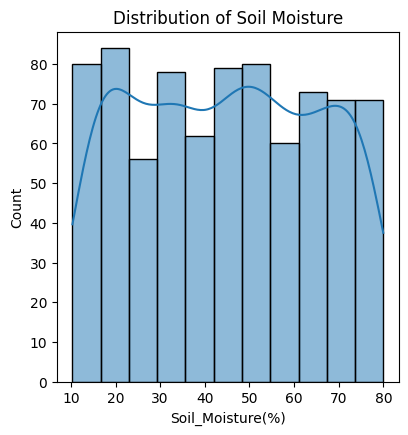

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['Soil_Moisture(%)'], kde=True)
plt.title(f'Distribution of Soil Moisture')
plt.show()

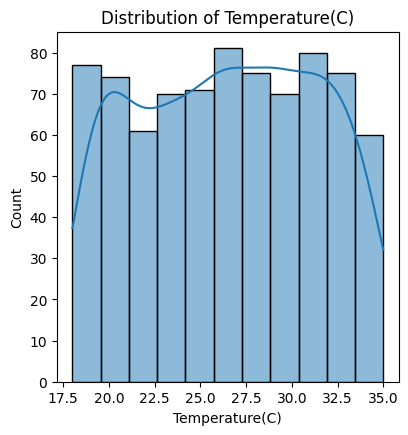

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
sns.histplot(df['Temperature(C)'], kde=True)
plt.title(f'Distribution of Temperature(C)')
plt.show()


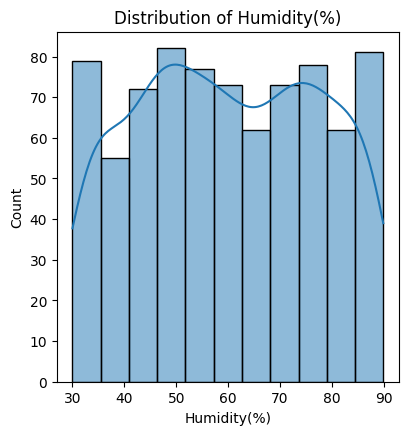

In [24]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 3)
sns.histplot(df['Humidity(%)'], kde=True)
plt.title(f'Distribution of Humidity(%)')
plt.show()


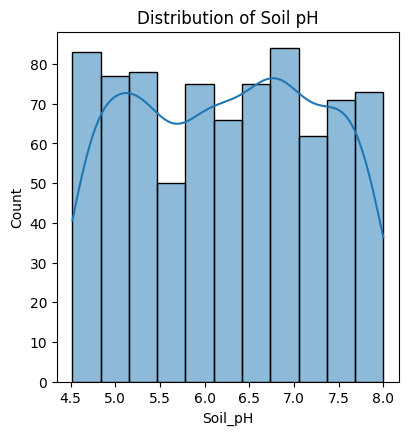

In [25]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
sns.histplot(df['Soil_pH'], kde=True)
plt.title(f'Distribution of Soil pH')
plt.show()


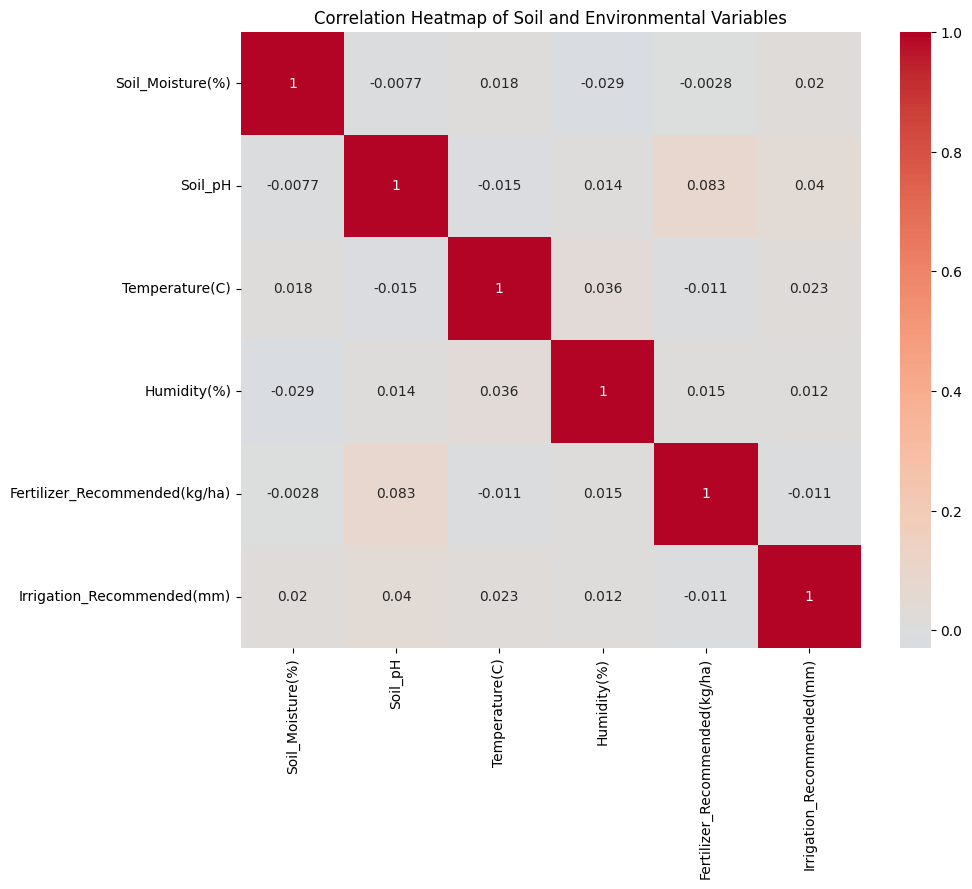

In [26]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Soil and Environmental Variables')
plt.show()


In [ ]:
#Wheat has the highest average soil moisture
#Soil_pH and Humidity influence fertilizer recommendations the most.

#Appropriate irrigation adjustments; Increase irrigation by 10-15% to compensate for higher evaporation rates
#Implement more frequent but shorter irrigation cycles to prevent water stress
#Consider mulching to retain soil moisture
#Monitor soil moisture levels more closely during heat waves.

#Insights and Recommendations:
#Crops frequently experiencing temperatures above 30°C are primarily Beans, Maize, and Lettuce.
#The crop type with the highest average soil moisture is Wheat (average 47.2%)
#Since fertilizer recommendations are most strongly correlated with soil moisture (negative correlation), ensure proper irrigation before fertilization
#Implement better data validation at the sensor level to reduce 'error' entries.
#Investigate why some crops are unidentified and standardize crop type recording to eliminate "Unknown" entries


In [27]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)